In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd

In [2]:
def annotate_scatter_points(points,fig,ax):
    """
    Annotate scatter plot points with point numbers.

    Parameters:
    - points: List of (x, y) coordinates for scatter plot.

    Example:
    annotate_scatter_points([[0, 0], [1, 1], [2, 3], [2, 5]])
    """

    for i, (x, y) in enumerate(points, 1):
        ax.annotate(f'{i}', (x, y), textcoords="offset points", xytext=(5,5), ha='center')

# Example usage 'annotate_scatter_points([[0, 0], [1, 1], [2, 3], [2, 5]],fig,axeee)''

In [20]:
def extract_substances(dataframe):
    # Get the column names from the DataFrame
    columns = dataframe.columns

    # Create a dictionary to store the count of each unique substance
    substance_counts = {}

    # Extract unique substances from the column names and count occurrences
    for column in columns:
        # Split the column name based on the numeric part
        substance = ''.join([i for i in column[:-1]])
        
        # Update the count in the dictionary
        substance_counts[substance] = substance_counts.get(substance, 0) + 1

    # Convert the dictionary to two lists (substances and counts) and sort them
    unique_substances_list = sorted(list(substance_counts.keys()))
    counts_list = [substance_counts[substance] for substance in unique_substances_list]

    return unique_substances_list,counts_list

In [3]:
def get_fp_data(fpc_object,pcs = 2,gridpoints = np.arange(360)):
    """
    'Inputs'
    fpc_obj - functional data object already in pca form (1-D)
    pcs - number of functional principal components to take into account (int)
    
    'Outputs'
    np.arr - X array (gridpoints)
    np.arr 2D - Y arrays (data points - no. fpcs - 2 by default)
    """
    fpc_grid_points = fpc_object.components_.to_grid(gridpoints).grid_points[0]
    fpc_data_points = [np.zeros_like(fpc_grid_points) for i in range(pcs)]
    fpc_variance_exp = np.array([fpc_object.explained_variance_ratio_[i] for i in range(pcs)])
    for i in range(pcs):
        fpc_data_points[i] = fpc_object.components_.to_grid(gridpoints)[i].data_matrix[0].flatten()
        
    return fpc_grid_points,fpc_data_points,fpc_variance_exp

In [4]:
#define parameters
specie = {'E':'Erpobdella','G':'Gammarus','R':'Radix'}
specie_dim = {'E':'X','G':'Y','R':'Z'}

In [6]:
#locate files and load data for each species
directory = r'D:\VP\ARTICLE3\ArticleData'
data = {}
for s in specie:
    file = r'{}\{}_{}_i_data.csv'.format(directory,s,specie_dim[s])
    print(file)
    data.update({s:pd.read_csv(file)})

if 'm_data' in file:
    mean = True #if IGT should be false
else:
    mean = False

D:\VP\ARTICLE3\ArticleData\E_X_i_data.csv
D:\VP\ARTICLE3\ArticleData\G_Y_i_data.csv
D:\VP\ARTICLE3\ArticleData\R_Z_i_data.csv


In [7]:
#Data Transformations for data with camera calibration error
calibration_mean,calibration_IGT = {'E':{},'G':{},'R':{}},{s:{} for s in specie}

if mean: 
    rules = calibration_mean
else:
    rules = calibration_IGT

In [9]:
data['E'].head()

,1-2Dichloroethane0,1-2Dichloroethane1,1-2Dichloroethane2,1-chlorodecane0,2A10,2A11,4-octylphenol0,4-octylphenol1,124-Trichlorobenzene0,124-Trichlorobenzene1,...,Trifluralin1,Trifluralin2,Trifluralin3,Verapamil0,Verapamil1,Verapamil2,Zinc0,Zinc1,Zinc2,Zinc3
0,0.133216,0.155410,0.105804,0.007479,0.046528,0.100513,0.009506,0.009506,0.007821,0.016676,...,0.0,0.005905,0.0,0.013629,0.0,0.039724,0.035926,0.005814,NaN,NaN
1,0.197503,0.205303,0.097796,0.007274,0.076142,0.165830,0.011393,0.011393,0.007050,0.018434,...,0.0,0.005550,0.0,0.013543,0.0,0.032204,0.033850,0.005609,NaN,NaN
2,0.228928,0.271855,0.087572,0.006784,0.111444,0.255442,0.014767,0.014767,0.006614,0.021075,...,0.0,0.004490,0.0,0.013616,0.0,0.026898,0.046223,0.005037,NaN,NaN
3,0.260672,0.354205,0.074385,0.006800,0.156157,0.356129,0.016946,0.016946,0.006140,0.023814,...,0.0,0.000000,0.0,0.012178,0.0,0.026512,0.078248,0.004210,NaN,NaN
4,0.299697,0.432230,0.060215,0.006974,0.205188,0.460003,0.018443,0.018443,0.006701,0.026928,...,0.0,0.000000,0.0,0.011165,0.0,0.030568,0.120326,0.000000,NaN,NaN


In [10]:
for s in specie:
    df = data[s].copy()
    for key in rules[s]:
        df[df.columns[key]] = df[df.columns[key]] * rules[s][key]
    data[s] = df

In [21]:
#identify all used substances
substances,counts = extract_substances(data[[*data][0]])
for i in range(len(substances)): print('{}: {} repetitions'.format(substances[i],counts[i]))
subcounts = dict(zip(substances,counts))

1-2Dichloroethane: 3 repetitions
1-chlorodecane: 1 repetitions
124-Trichlorobenzene: 2 repetitions
2A1: 2 repetitions
4-octylphenol: 2 repetitions
A736: 3 repetitions
Acetone: 1 repetitions
Acide Acrylique: 3 repetitions
Aluminium: 2 repetitions
Anthracene: 2 repetitions
Benzene: 1 repetitions
Benzo(a)pyrene: 2 repetitions
Biphenyl: 1 repetitions
Carbaryl: 2 repetitions
Chlorothanolil: 3 repetitions
Chlorpyrifos: 2 repetitions
Cobalt: 1 repetitions
Copper: 8 repetitions
Cypermethrine: 2 repetitions
DDD(2-4): 3 repetitions
Dicofol: 2 repetitions
Dieldrin: 2 repetitions
H40: 3 repetitions
Hydrazine: 2 repetitions
Ibuprofen: 1 repetitions
Isodrin: 2 repetitions
L1000: 2 repetitions
Lindane: 1 repetitions
Mercury: 4 repetitions
Methomyl: 7 repetitions
Nitric Acid: 1 repetitions
Pentachlorophenol: 2 repetitions
PiperonylButoxide: 2 repetitions
Quinoxyfen: 3 repetitions
Soja: 2 repetitions
Tebufenozide: 2 repetitions
Tetrachloroethylene: 2 repetitions
Trichlorobenzene(123): 4 repetitions
Tri

In [24]:
substances[:5]

['1-2Dichloroethane',
 '1-chlorodecane',
 '124-Trichlorobenzene',
 '2A1',
 '4-octylphenol']

In [25]:
#colours inspired from plotly
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
sns.set_palette(colors)
colors

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

In [26]:
#Define columns and y values for functional data analysis
cols = data[[*data][0]].columns
y = ['{}'.format(s) for i,s in enumerate(substances) for x in range(counts[i])]
y

['1-2Dichloroethane',
 '1-2Dichloroethane',
 '1-2Dichloroethane',
 '1-chlorodecane',
 '124-Trichlorobenzene',
 '124-Trichlorobenzene',
 '2A1',
 '2A1',
 '4-octylphenol',
 '4-octylphenol',
 'A736',
 'A736',
 'A736',
 'Acetone',
 'Acide Acrylique',
 'Acide Acrylique',
 'Acide Acrylique',
 'Aluminium',
 'Aluminium',
 'Anthracene',
 'Anthracene',
 'Benzene',
 'Benzo(a)pyrene',
 'Benzo(a)pyrene',
 'Biphenyl',
 'Carbaryl',
 'Carbaryl',
 'Chlorothanolil',
 'Chlorothanolil',
 'Chlorothanolil',
 'Chlorpyrifos',
 'Chlorpyrifos',
 'Cobalt',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Copper',
 'Cypermethrine',
 'Cypermethrine',
 'DDD(2-4)',
 'DDD(2-4)',
 'DDD(2-4)',
 'Dicofol',
 'Dicofol',
 'Dieldrin',
 'Dieldrin',
 'H40',
 'H40',
 'H40',
 'Hydrazine',
 'Hydrazine',
 'Ibuprofen',
 'Isodrin',
 'Isodrin',
 'L1000',
 'L1000',
 'Lindane',
 'Mercury',
 'Mercury',
 'Mercury',
 'Mercury',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Methomyl',
 'Me

In [27]:
#custom legend handles
from matplotlib.lines import Line2D
legend_handles = [Line2D([0], [0], color=plot_colors[sub], label=sub) for sub in substances]

NameError: name 'plot_colors' is not defined

Text(0, 0.5, 'Normalised mean amplitude')

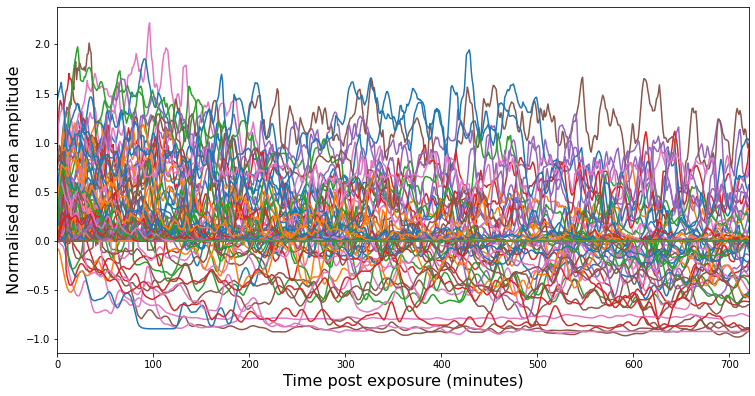

In [30]:
#plot for individual species
fig = plt.figure(figsize = (12,6))
axe = fig.add_axes([0.1,0.1,0.8,0.8])
sp = 'G'
for x,col in enumerate(data[sp].columns):
    axe.plot(data[sp].index,data[sp][col].values)
    
axe.set_xlim([0,720])

axe.set_xlabel('Time post exposure (minutes)',fontsize = 16)
axe.set_ylabel('Normalised mean amplitude',fontsize = 16)

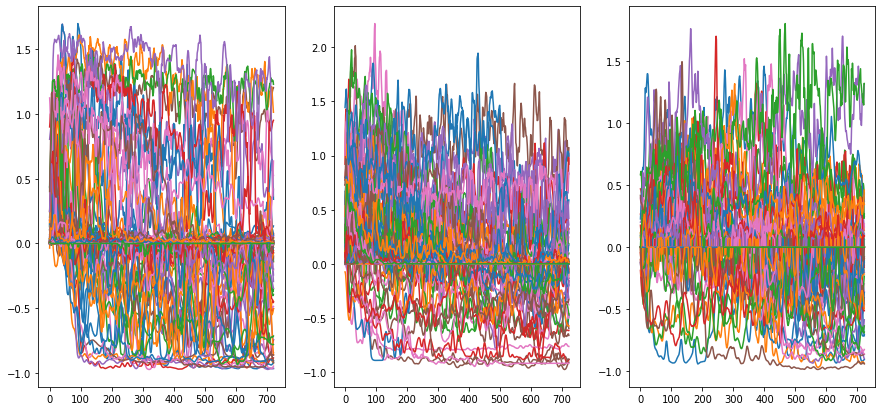

In [32]:
fig,axes = plt.subplots(1,3,figsize=(15,7))
for i,s in enumerate(specie):
    for x,col in enumerate(data[s].columns):
        axes[i].plot(data[s].index,data[s][col].values)

## Functional BSpline approx

In [33]:
from skfda.representation.grid import FDataGrid
from skfda.representation.basis import BSplineBasis

In [34]:
#Define timestep for data and extract first 2 hours (60 * 2 * 3) - timesteps 20s
timestep = 30
full_length = data[[*data][0]].shape[0]
#n_rows = (full_length//timestep)*timestep
n_rows = 540
#Cut dataframe at n_rows
for s in specie:
    data[s] = data[s].iloc[:n_rows]
    
data[s].shape

(540, 110)

In [35]:
#define FDA parameters with uneven knots
domain_range = (0,n_rows)
order = 4

#define knots with uneven spacing
knots = np.hstack((np.array([0,30,60,90]),np.arange(180,n_rows+90,90)))
#knots = np.hstack((np.array([0,30,60,90,120,150]),np.arange(180,181)))

n_basis = len(knots) + order - 2

bbs = BSplineBasis(domain_range = domain_range,n_basis = n_basis,order = order,knots = knots)
print('FDA knots')
knots

FDA knots


array([  0,  30,  60,  90, 180, 270, 360, 450, 540])

In [36]:
#define grid points and data matrices
grid_points = np.arange(n_rows)
data_matrices = {s:np.transpose(np.array(data[s].iloc[:n_rows])) for s in specie}

#define functional data grids
fds = {s:FDataGrid(data_matrix=data_matrices[s],grid_points=grid_points,) for s in specie}

In [37]:
#create basis functions
bss = BSplineBasis(domain_range = domain_range,n_basis = n_basis,order = order,knots = knots)

In [38]:
#basis dictionary per species
X_bss = {s:fds[s].to_basis(bss) for s in specie}

ValueError: array must not contain infs or NaNs

1080